Accuracy: 0.78
Confusion Matrix:
 [[26  5  0  0  0]
 [ 1 36  4  0  0]
 [ 0 11 12  9  0]
 [ 0  0  2 35  8]
 [ 0  0  0  7 58]]


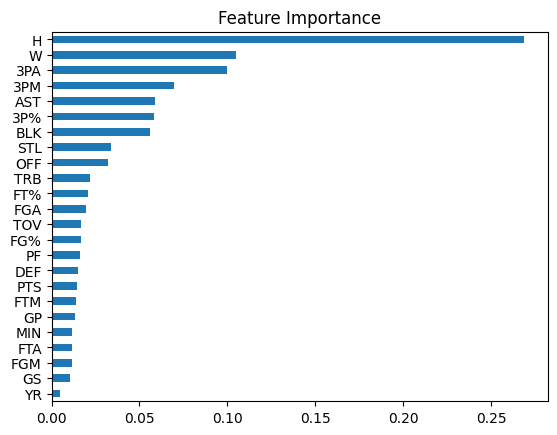

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('basketball_stats.csv')

# Preprocessing
df.drop('NAME', axis=1, inplace=True)  # Remove identifier
X = df.drop('POS', axis=1)
y = df['POS']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Model
# You can adjust parameters like n_estimators, max_depth according to your needs
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
clf.fit(X_train_scaled, y_train)

# Evaluation
y_pred = clf.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature Importance
importance = pd.Series(clf.feature_importances_, index=X.columns)
importance.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()

Accuracy: 0.73
Confusion Matrix:
 [[25  6  0  0  0]
 [ 4 33  4  0  0]
 [ 0 14 12  6  0]
 [ 0  1  6 30  8]
 [ 0  0  0  9 56]]


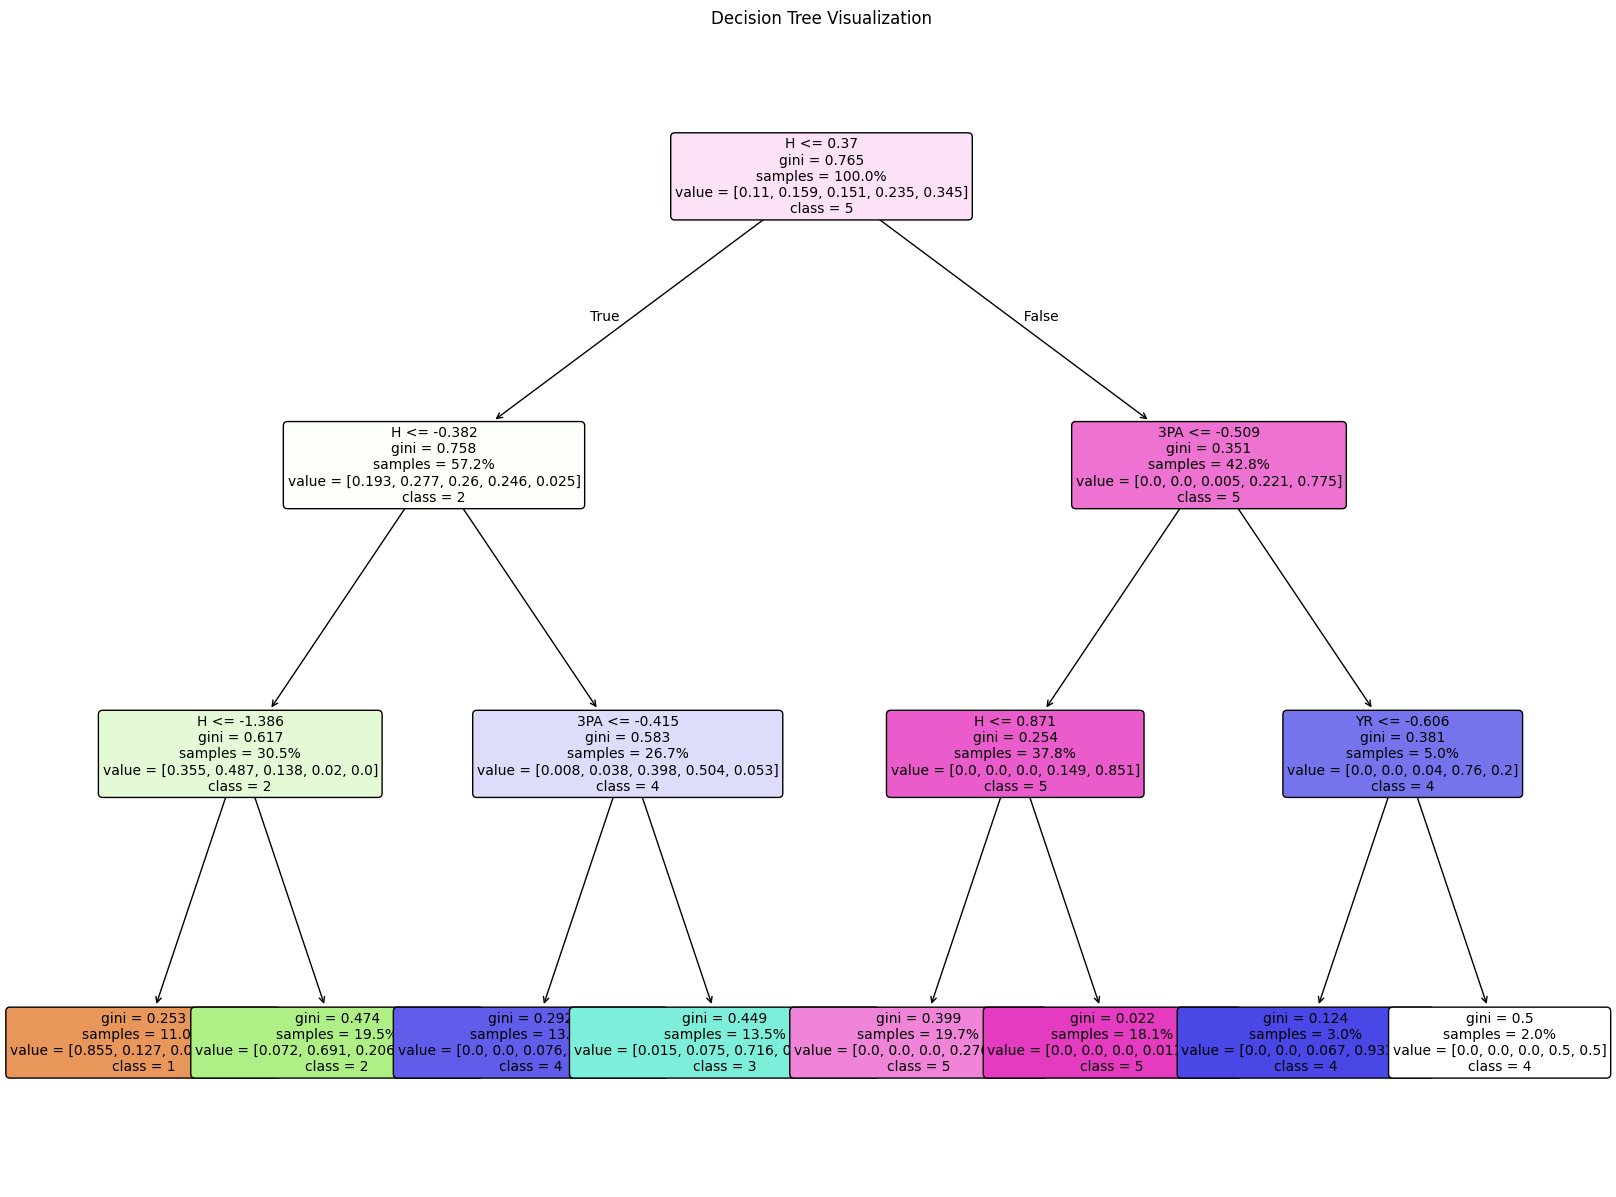

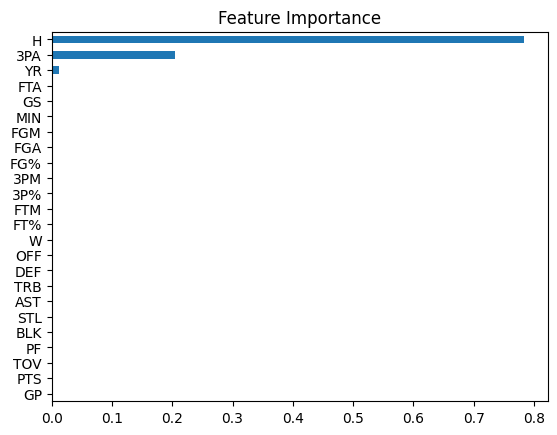

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# 加载数据
df = pd.read_csv('basketball_stats.csv')

# 数据预处理
df.drop('NAME', axis=1, inplace=True)  # 移除球员名字（标识符）
X = df.drop('POS', axis=1)
y = df['POS']

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 特征标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 定义决策树模型（可调整max_depth等参数控制树的复杂度）
clf = DecisionTreeClassifier(max_depth=3, random_state=42)  # 限制树深度便于可视化
clf.fit(X_train_scaled, y_train)

# 模型评估
y_pred = clf.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ------------------- 新增：决策树可视化 -------------------
plt.figure(figsize=(20, 15))  # 调整画布大小
# 将 class_names 中的元素转换为字符串类型
class_names = [str(cls) for cls in sorted(y.unique())]
plot_tree(
    clf,
    feature_names=X.columns,  # 使用特征名称
    class_names=class_names,  # 显示目标类别（POS的取值）
    filled=True,  # 用颜色填充叶子节点（按类别比例）
    rounded=True,  # 圆角矩形
    proportion=True,  # 显示类别比例
    fontsize=10  # 调整字体大小
)
plt.title("Decision Tree Visualization")
plt.show()

# 特征重要性（可选：保留随机森林的特征选择思想，但此处用决策树的特征重要性）
importance = pd.Series(clf.feature_importances_, index=X.columns)
importance.sort_values().plot(kind='barh', title='Feature Importance')
plt.show()